# <center> CM3070 Computer Science Final Project Report </center>

<center> LEUNG KA WAI </center>
<center> Candidate No. MY0092  </center>


Stock market is an important part of the modern economy, which not only enables companies to be traded publicly and raise capital, but also provides investors a way to invest money in order to potentially earn a share of the company’s profits. In this project, we will use deep reinforcement learning to train an agent, who can optimize stock trading strategies and eventually maximize its trading profit. We will select 30 stocks for training and testing and select Dow Jones Industrial Average (DJIA) as a benchmark for performance comparison. Our proposed deep reinforcement learning strategy is “deep deterministic policy gradient” (DDPG) and is shown to outperform DJIA benchmark in terms of cumulative returns and sharpe ratio. The main purpose of this project is to study the rationale of deep reinforcement learning. As such, our focus is to construct a reinforcement-learning environment and build DDPG algorithms from scratch. Due to limitation of time and  computation power, the total number of hyperparameter combinations tuned are limited. However, interest users can pass in their hyperparameters into our functions to fit their needs.

This notebook is organized as follows:
+ Section 1 contains Python Package Required;
+ Section 2 contains Data Download;
+ Section 3 contains Data Preprocessing and Visualization;
+ Section 4 contains environment construction;
+ Section 5 is the DDPG algorithm implementation;
+ Section 6 is the trading on test set;
+ Section 7 describes the performance of our agent
+ Section 8 concludes.

Kindly note that the training time may take a few hours depending on number of epochs <br>
Reference:
https://towardsdatascience.com/finrl-for-quantitative-finance-tutorial-for-multiple-stock-trading-7b00763b7530
https://colab.research.google.com/github/AI4Finance-LLC/FinRL-Library/blob/master/notebooks/this_works_1_18.ipynb

# 1 Python Package Installation

As a first step we check if packages needed are present, if not install them.
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

In [ ]:
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install stockstats
!pip install gym
!pip install tensorflow
!pip install git+https://github.com/quantopian/pyfolio
!pip install git+https://github.com/Stable-Baselines-Team/stable-baselines-tf2
!pip install --upgrade tensorflow
!pip install mplfinance --upgrade --user -i https://pypi.tuna.tsinghua.edu.cn/simple

You should consider upgrading via the 'c:\users\uya4578\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\uya4578\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\uya4578\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\uya4578\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\uya4578\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\uya4578\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\uya4578\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Running command git clone -q https://github.com/quantopian/pyfolio 'C:\Users\uya4578\AppData\Local\Temp\pip-req-build-d4ladebu'
You should consider upgrading via the 'c:\users\uya4578\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.



  Cloning https://github.com/quantopian/pyfolio to c:\users\uya4578\appdata\local\temp\pip-req-build-d4ladebu
  Cloning https://github.com/Stable-Baselines-Team/stable-baselines-tf2 to c:\users\uya4578\appdata\local\temp\pip-req-build-nuwz0jhz


  Running command git clone -q https://github.com/Stable-Baselines-Team/stable-baselines-tf2 'C:\Users\uya4578\AppData\Local\Temp\pip-req-build-nuwz0jhz'
You should consider upgrading via the 'c:\users\uya4578\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached tensorflow-2.4.0-cp38-cp38-win_amd64.whl (370.7 MB)


You should consider upgrading via the 'c:\users\uya4578\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Could not fetch URL https://pypi.tuna.tsinghua.edu.cn/simple/mplfinance/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.tuna.tsinghua.edu.cn', port=443): Max retries exceeded with url: /simple/mplfinance/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)'))) - skipping


You should consider upgrading via the 'c:\users\uya4578\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


### Import packages

In [ ]:
import os
import gym
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf
from tqdm import tqdm
from stockstats import StockDataFrame as Sdf
import pyfolio
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from stable_baselines import TD3
from stable_baselines.td3.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.noise import NormalActionNoise, AdaptiveParamNoiseSpec, OrnsteinUhlenbeckActionNoise

c:\users\uya4578\appdata\local\programs\python\python38\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


# 2 Download Data
We download stock data from Yahoo Finance.

The Dow Jones Industrial Average (DJIA), or simply the Dow 30, is a stock market index that measures the stock performance of 30 large companies listed on stock exchanges in the United States.<p>
The composition of DJIA varies and will be updated with economic changes.In our implementation, we hereby choose the followings: AAPL, MSFT, JPM, V, RTX, PG, GS, NKE, DIS, AXP, HD, INTC, WMT, IBM, MRK, UNH, KO, CAT, TRV, JNJ, CVX, MCD, VZ, CSCO, XOM, BA, MMM, PFE, WBA, DD. <br>
Reference: https://www.investopedia.com/terms/d/djia.asp<p>

In [ ]:
stock_ticker = ['AAPL','MSFT','JPM','V','RTX','PG','GS','NKE','DIS','AXP',
                  'HD','INTC','WMT','IBM','MRK','UNH','KO','CAT','TRV','JNJ',
                  'CVX','MCD','VZ','CSCO','XOM','BA','MMM','PFE','WBA','DD']
# Download data
stock_raw = pd.DataFrame()
for ticker in stock_ticker:
    data_df = yf.download(ticker, start="2010-01-01", end="2021-1-31")
    data_df['ticker'] = ticker
    stock_raw=stock_raw.append(data_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
# reset the index, we want to use numbers instead of dates
stock=stock_raw.reset_index()

# convert the column names to standardized names
stock.columns = ['datadate','open','high','low','close','adjcp','volume','ticker']

# convert date to string format, easy to filter
stock['datadate']=stock.datadate.apply(lambda x: x.strftime('%Y-%m-%d'))

'adjcp' stands for the Adjusted Closing Price.<p>
The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions(such as stock splits, dividends, and rights offerings). It is often used when examining historical returns or doing a detailed analysis of past performance.<p>
https://www.investopedia.com/terms/a/adjusted_closing_price.asp

In [ ]:
stock

,datadate,open,high,low,close,adjcp,volume,ticker
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.482683,352410800,AAPL
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.583586,493729600,AAPL
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.594968,601904800,AAPL
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.490066,552160000,AAPL
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.478067,477131200,AAPL
...,...,...,...,...,...,...,...,...
83665,2021-01-25,80.419998,81.809998,80.419998,81.349998,81.000107,23606100,DD
83666,2021-01-26,81.660004,82.209999,79.550003,79.830002,79.486649,26750000,DD
83667,2021-01-27,78.339996,79.900002,76.879997,77.900002,77.564949,38646100,DD
83668,2021-01-28,78.239998,81.410004,78.010002,81.120003,80.771103,38708500,DD


# 3 Preprocess Data
In this section, we check:
+ Check missing data
+ Add technical indicators
+ Visualization

## 3.1 Check missing data

In [ ]:
# check missing data and drop na
stock.isnull().values.any()
stock=stock.dropna()

In [ ]:
stock.ticker.value_counts()

INTC    2789
UNH     2789
MSFT    2789
TRV     2789
AAPL    2789
JNJ     2789
MCD     2789
IBM     2789
PFE     2789
XOM     2789
DD      2789
CSCO    2789
AXP     2789
BA      2789
V       2789
RTX     2789
JPM     2789
DIS     2789
VZ      2789
NKE     2789
WMT     2789
GS      2789
PG      2789
WBA     2789
MMM     2789
MRK     2789
CAT     2789
KO      2789
CVX     2789
HD      2789
Name: ticker, dtype: int64

## 3.2 Add technical indicators
In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.

### Indicator 1: MACD
Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.

$MACD=EMA_{12} − EMA_{26}$

Reference: https://www.investopedia.com/terms/m/macd.asp

### Indicator 2: RSI

The RSI provides technical traders signals about bullish and bearish price momentum, and it is often plotted beneath the graph of an asset's price.
An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.

$RSI=100 - \frac{100}{1+\frac{Previous\ Average\ Gain * (n-1) + Current\ Gain}{Previous\ Average\ Loss * (n-1) + Current\ Loss}}$

Reference: https://www.investopedia.com/terms/r/rsi.asp

### Indicator 3: CCI

The CCI is a market indicator used to track market movements that may indicate buying or selling.
The CCI compares current price to average price over a specific time period.

$CCI = \frac{Typical\ Price - Simple\ Moving\ Average}{0.015\ *\ Mean\ Deviation}$

The Commodity Channel Index​ (CCI) is a momentum-based oscillator used to help determine when an investment vehicle is reaching a condition of being overbought or oversold.

This technical indicator assesses price trend direction and strength, allowing traders to determine if they want to enter or exit a trade, refrain from taking a trade, or add to an existing position. In this way, the indicator can be used to provide trade signals when it acts in a certain way.

The operating range of the CCI indicator is divided into three categories: +100 or above is an overbought area, below -100 is an oversold area, and between +100 and -100 is a divergence area. First of all, in the divergence area between +100 and -100, this indicator is basically meaningless and cannot provide clear suggestions for the operation of the market and individual stocks, so it is invalid under normal circumstances, which means the CCI indicator is specifically designed for extreme situations. That is to say, under the normal market conditions, the CCI indicator will not work.

Reference: https://www.investopedia.com/terms/c/commoditychannelindex.asp

### Indicator 4: TRIX
The triple exponential average (TRIX) indicator is an oscillator used to identify oversold and overbought markets, and it can also be used as a momentum indicator. Like many oscillators, TRIX oscillates around a zero line. When it is used as an oscillator, a positive value indicates an overbought market while a negative value indicates an oversold market. When TRIX is used as a momentum indicator, a positive value suggests momentum is increasing while a negative value suggests momentum is decreasing. Many analysts believe that when the TRIX crosses above the zero line it gives a buy signal, and when it closes below the zero line, it gives a sell signal. Also, divergences between price and TRIX can indicate significant turning points in the market.


TRIX calculates a triple exponential moving average of the log of the price input over the period of time specified by the length input for the current bar. The current bar's value is subtracted by the previous bar's value. This prevents cycles that are shorter than the period defined by length input from being considered by the indicator.

Reference: https://www.investopedia.com/terms/t/trix.asp

In [ ]:
def add_technical_indicator(df): #function to calculate technical indicators
        stock = Sdf.retype(df.copy())
        stock['close'] = stock['adjcp']
        unique_ticker = stock.ticker.unique()

        macd = pd.DataFrame()
        rsi = pd.DataFrame()
        cci = pd.DataFrame()
        trix = pd.DataFrame()

        # https://pypi.org/project/stockstats/
        for i in range(len(unique_ticker)):
            # macd
            temp_macd = stock[stock.ticker == unique_ticker[i]]['macd']
            temp_macd = pd.DataFrame(temp_macd)
            macd = macd.append(temp_macd, ignore_index=True)
            # rsi
            temp_rsi = stock[stock.ticker == unique_ticker[i]]['rsi_12'] # 12 days RSI or rsi_6
            temp_rsi = pd.DataFrame(temp_rsi)
            rsi = rsi.append(temp_rsi, ignore_index=True)
            # cci
            temp_cci = stock[stock.ticker == unique_ticker[i]]['cci']
            temp_cci = pd.DataFrame(temp_cci)
            cci = cci.append(temp_cci, ignore_index=True)
            # trix
            temp_trix = stock[stock.ticker == unique_ticker[i]]['trix']
            temp_trix = pd.DataFrame(temp_trix)
            trix = trix.append(temp_trix, ignore_index=True)

        df['macd'] = macd
        df['rsi'] = rsi
        df['cci'] = cci
        df['trix'] = trix

        return df

In [ ]:
stock = add_technical_indicator(stock)

In [ ]:
# check missing data
stock.isnull().values.any()

# fill missing data with forward filling and backward filling
stock=stock.fillna(method='ffill')
stock=stock.fillna(method='bfill')

In [ ]:
# check missing data
stock.isnull().values.any()

False

In [ ]:
stock

,datadate,open,high,low,close,adjcp,volume,ticker,macd,rsi,cci,trix
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.482683,352410800,AAPL,0.000000,100.000000,66.666667,0.247369
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.583586,493729600,AAPL,0.002264,100.000000,66.666667,0.247369
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.594968,601904800,AAPL,0.003238,100.000000,74.644849,0.192938
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.490066,552160000,AAPL,-0.000186,47.580957,-40.480501,0.105613
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.478067,477131200,AAPL,-0.002520,44.659990,-108.843164,0.049159
...,...,...,...,...,...,...,...,...,...,...,...,...
83665,2021-01-25,80.419998,81.809998,80.419998,81.349998,81.000107,23606100,DD,3.797464,61.357702,-5.561292,0.914947
83666,2021-01-26,81.660004,82.209999,79.550003,79.830002,79.486649,26750000,DD,3.425431,55.719581,-58.295911,0.850560
83667,2021-01-27,78.339996,79.900002,76.879997,77.900002,77.564949,38646100,DD,2.941618,49.428229,-167.105936,0.769556
83668,2021-01-28,78.239998,81.410004,78.010002,81.120003,80.771103,38708500,DD,2.784801,58.049326,-83.412594,0.696848


## 3.3 Stock Visualization
Using Apple ("AAPE") as an example.

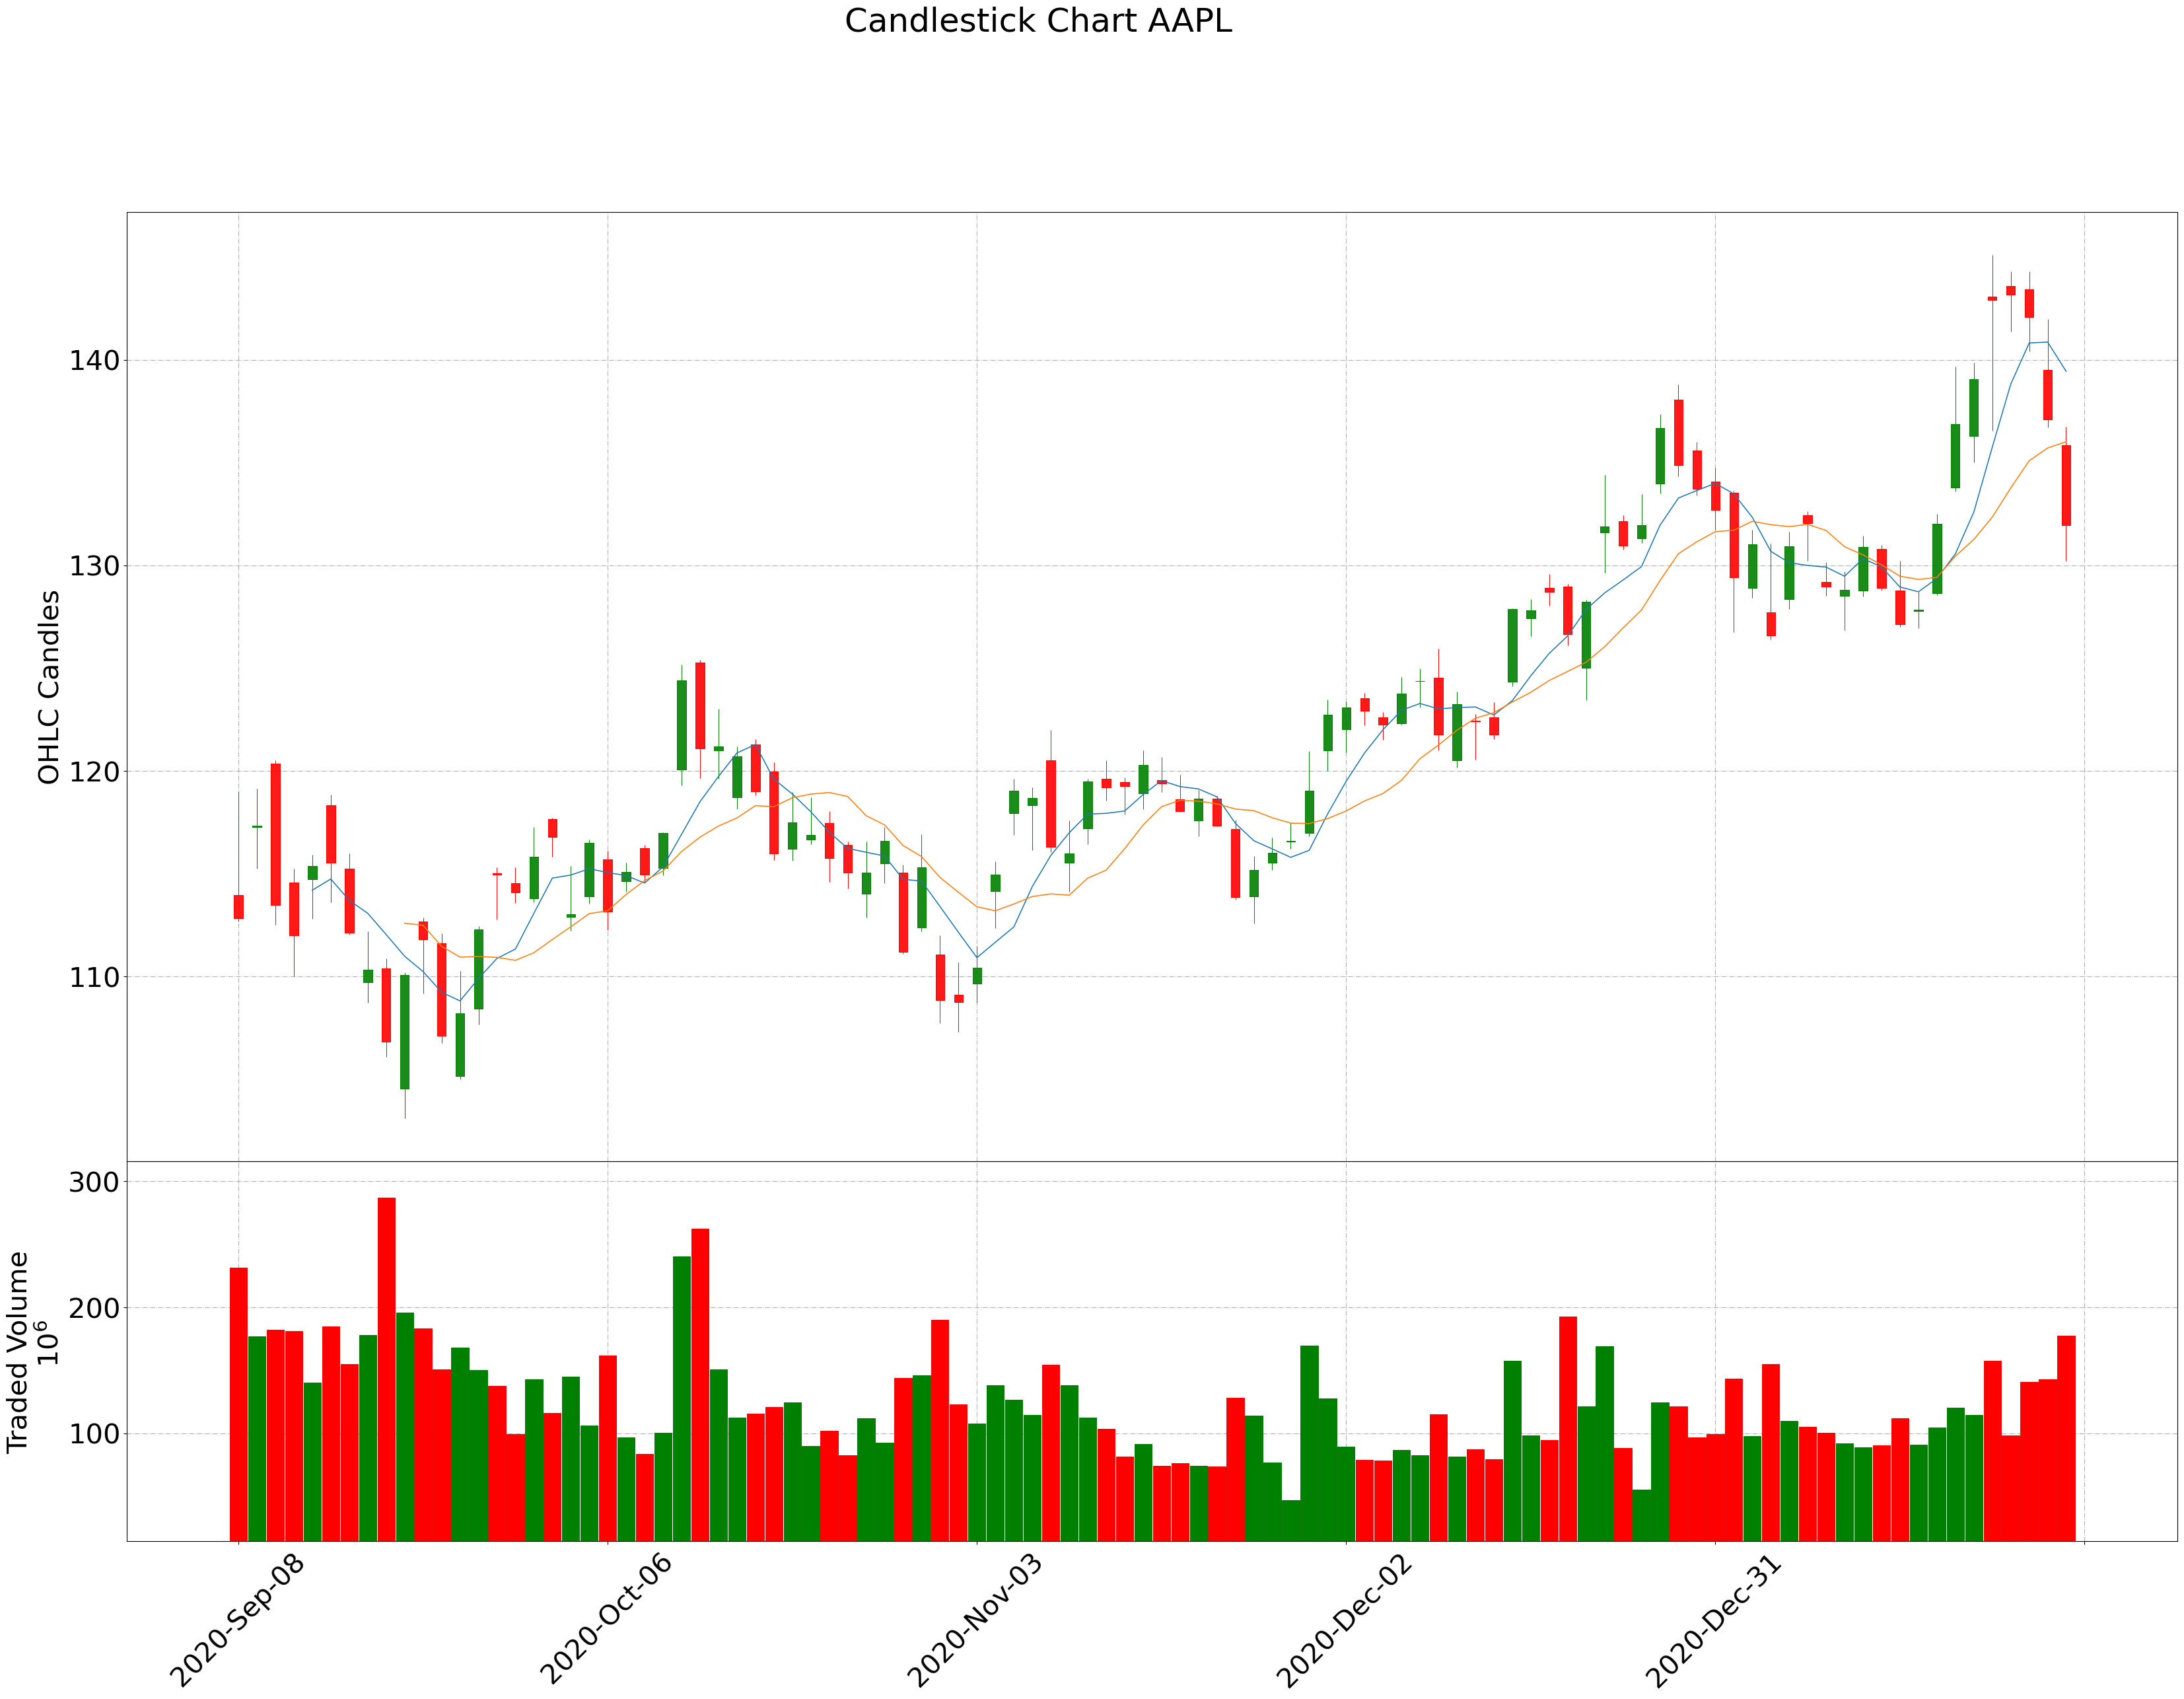

In [ ]:
import matplotlib.ticker as ticker
import mplfinance as mpf
import matplotlib as mpl
from cycler import cycler
import matplotlib.pyplot as plt

symbol="AAPL"
period = 100
candlestick = stock[stock.ticker==symbol][['datadate','open','high','low','close','volume']]
candlestick.rename(columns={
    'datadate': 'Date', 'open': 'Open', 'high': 'High',
    'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)
candlestick['Date'] = pd.to_datetime(candlestick['Date'])
candlestick.set_index(['Date'], inplace=True)
candlestick = candlestick[-period:]

kwargs = dict(
    type='candle',
    mav=(5,10),
    volume=True,
    title=f'Candlestick Chart {symbol}',
    ylabel='OHLC Candles',
    ylabel_lower='Traded Volume',
    figratio=(15, 10),
    figscale=5)

mc = mpf.make_marketcolors(
    up='green',
    down='red',
    edge='i',
    wick='i',
    volume='in',
    inherit=True)

s = mpf.make_mpf_style(
    gridaxis='both',
    gridstyle='-.',
    y_on_right=False,
    rc={'font.size':30},
    marketcolors=mc)

mpl.rcParams['axes.prop_cycle'] = cycler(
    color=['dodgerblue', 'deeppink',
    'navy', 'teal', 'maroon', 'darkorange',
    'indigo'])
mpl.rcParams['lines.linewidth'] = .5

mpf.plot(candlestick, **kwargs, style=s, show_nontrading=False)

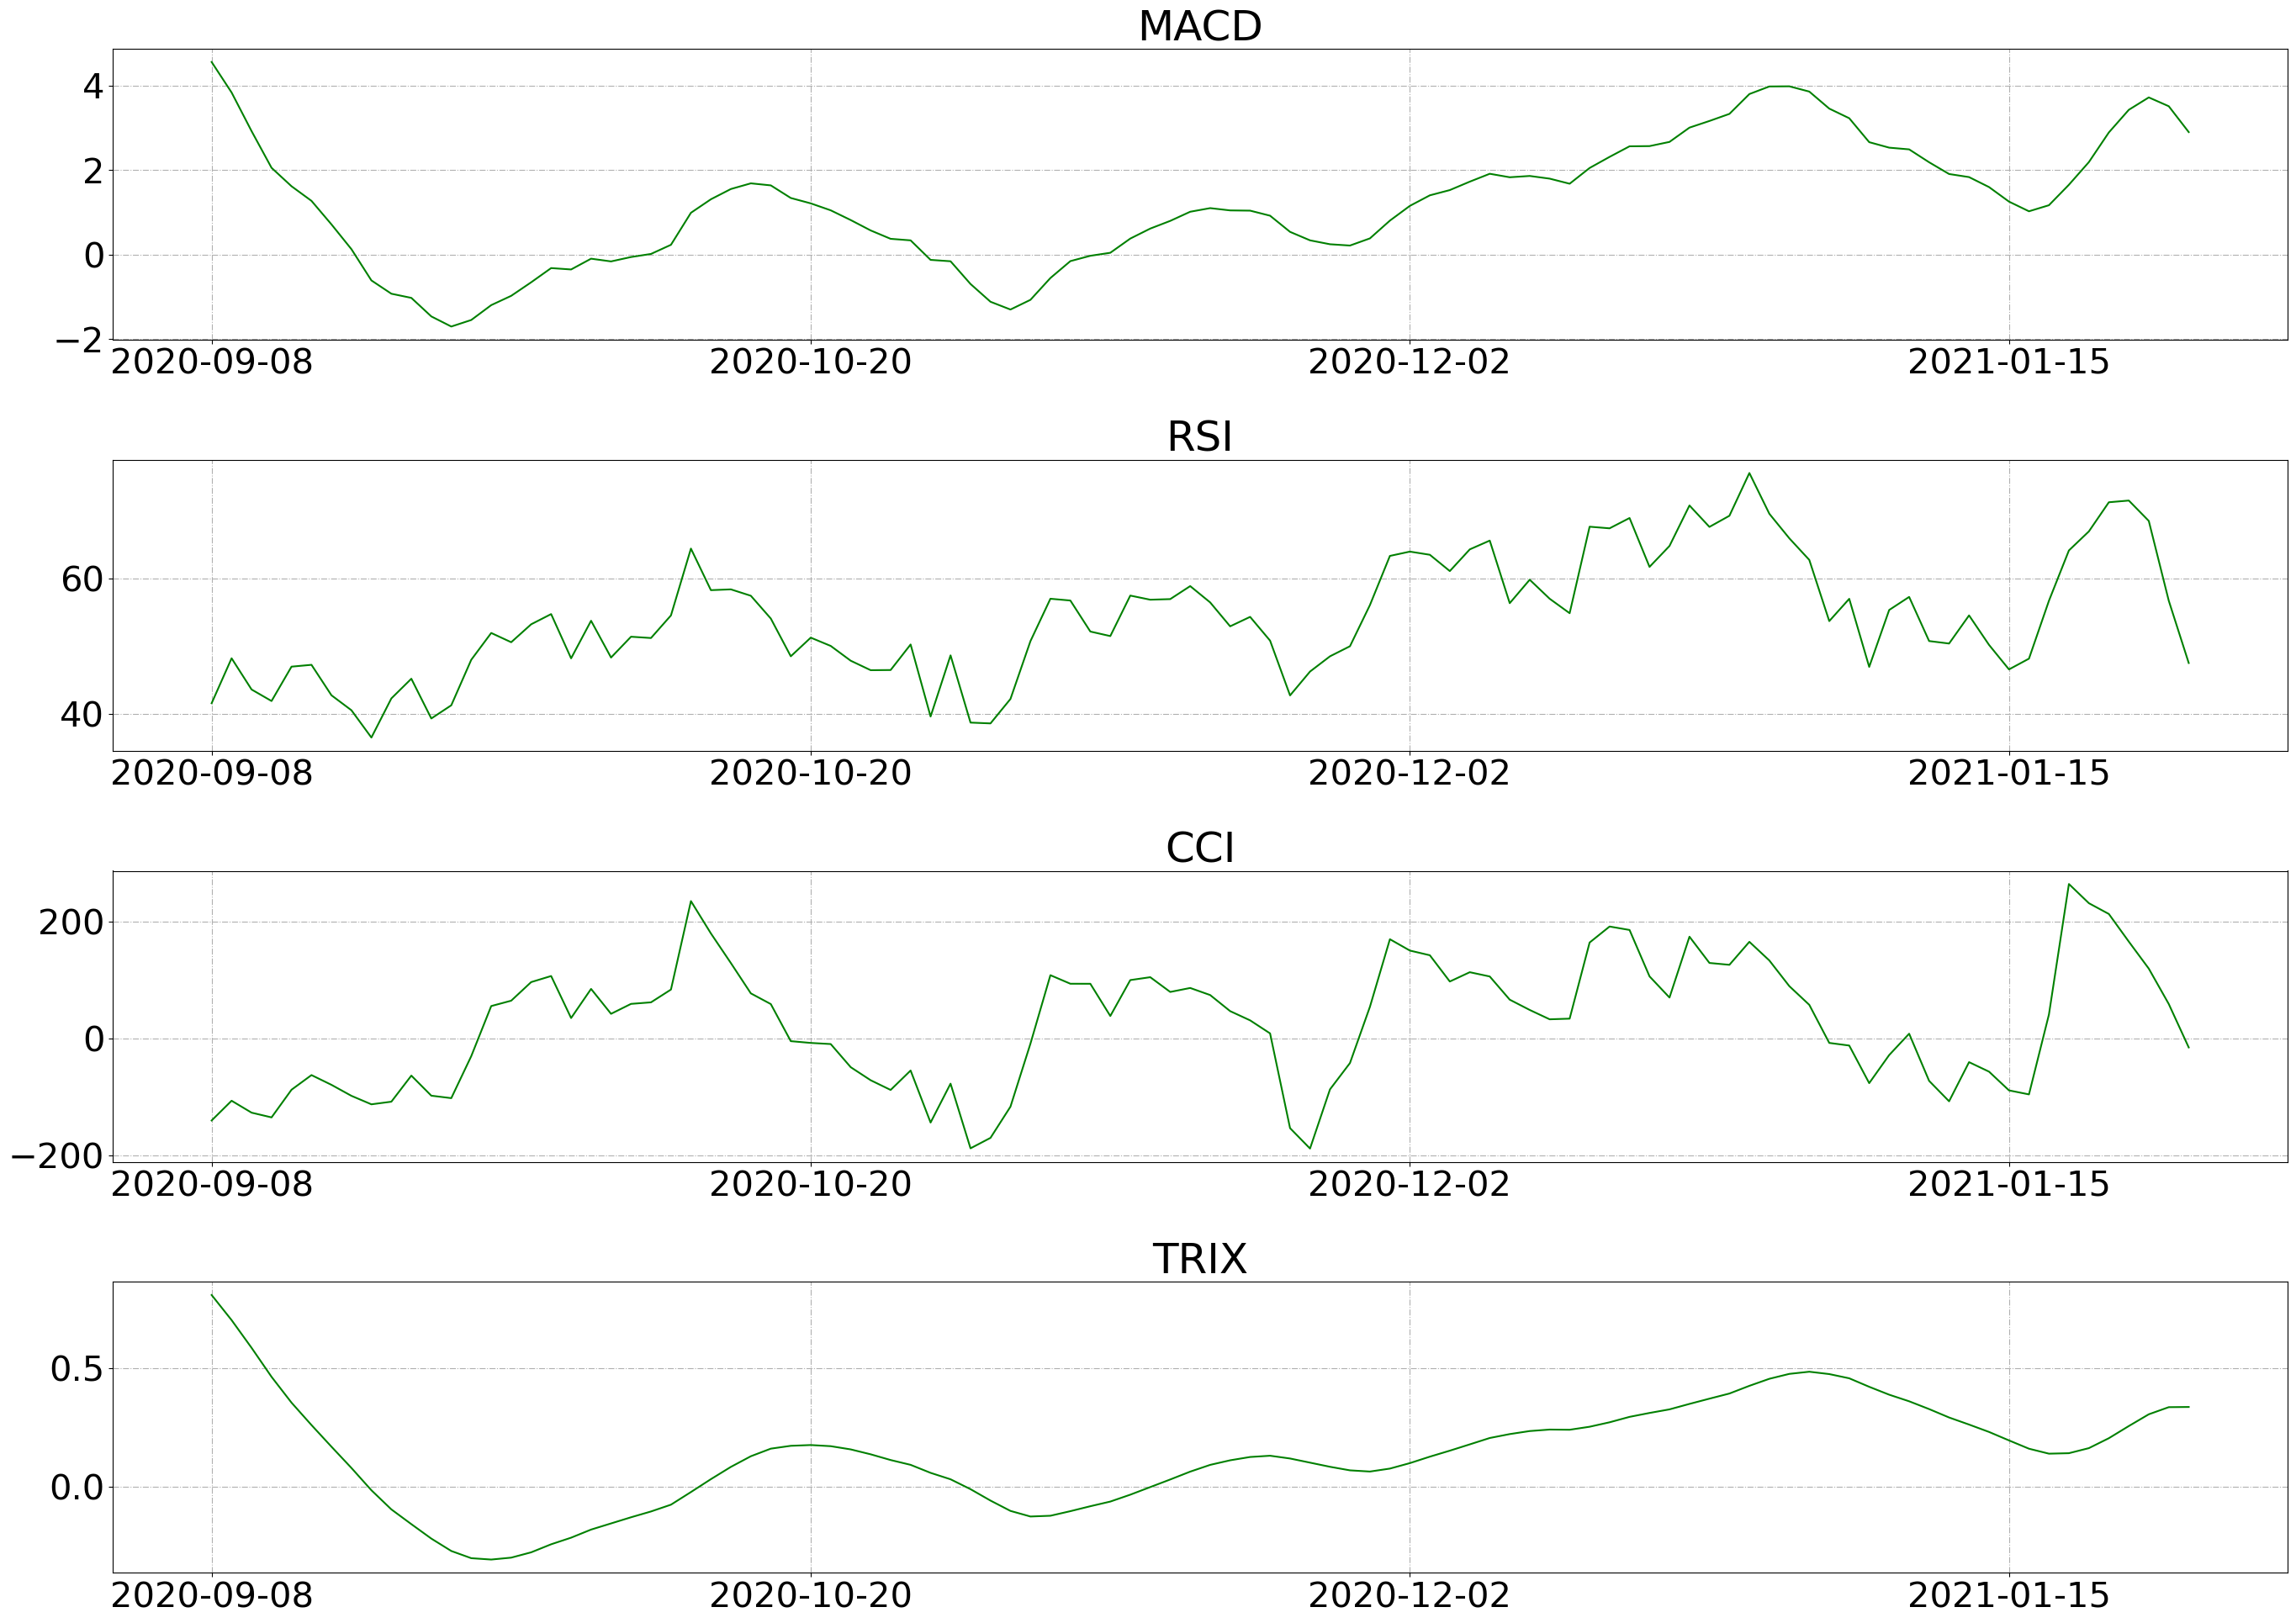

In [ ]:
indicators = stock[stock.ticker==symbol][['datadate','macd','rsi','cci','trix']]
fig = plt.figure(figsize=(28,20))
idx = ['macd','rsi','cci','trix']
indicators = indicators[-period:]
ax = 0
for i in range(len(idx)):
    ax = i+1
    subplt = fig.add_subplot(4,1,ax)
    subplt.plot(indicators['datadate'],indicators[idx[i]],color='green')
    subplt.set_title(idx[i].upper())
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(30))
fig.tight_layout()

# 4 Design Environment
Stock trading is a typical Markov Decision Process (MDP) problem due to its stochastic and interactive characteristics. In our implementation, we will use OpenAI gym to create a custom stock market environment for simulating stock trades.

We also have the following environment settings for our agents:
+ Initial cash capital to 1 Million USD.
+ The Maximum number of trades per stock per time step is 1000.
+ Transaction fees applied to every single trade is 0.1%.
+ The discount rate is 0.01% per time step; (Given our agent trades on a daily basis, it is approximately equivalent to 4% annually).
+ Our agent can buy and sell stocks at "adjcp" for each trade.
+ No short sell is allowed, i.e our agent is not allowed to take "short" positions.

## 4.1 Environment

In [ ]:
## Environment
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# max number of trades per stock
HMAX_NORMALIZE = 1000
# initial amount of money we have in our account
INITIAL_ACCOUNT_BALANCE=1000000
# total number of stocks in our portfolio
STOCK_DIM = 30
# transaction fee: 1/1000 reasonable percentage
TRANSACTION_FEE_PERCENT = 0.001

REWARD_SCALING = 1e-4

class StockEnv(gym.Env): #A stock trading environment for OpenAI gym
    metadata = {'render.modes': ['human']}

    def __init__(self, df,day = 0):
        self.day = day
        self.df = df

        # action_space normalization and shape is STOCK_DIM
        self.action_space = spaces.Box(low = -1, high = 1,shape = (STOCK_DIM,))
        # Shape = 1+7*STOCK_DIM: [Current Balance]+[prices 1-STOCK_DIM]+[owned shares 1-STOCK_DIM]+[trading volumns]+[macd 1-1-STOCK_DIM]+[rsi 1-1-STOCK_DIM]+[cci 1-1-STOCK_DIM]+[trix 1-1-STOCK_DIM]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape = ((1+7*STOCK_DIM),))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.terminal = False
        # initalize state
        self.state = [INITIAL_ACCOUNT_BALANCE] + self.data.adjcp.values.tolist() + [0]*STOCK_DIM + self.data.volume.values.tolist() + \
                      self.data.macd.values.tolist() + self.data.rsi.values.tolist() + self.data.cci.values.tolist() + self.data.trix.values.tolist()
        # initialize reward
        self.reward = 0
        self.cost = 0
        self.trades = 0
        # memorize all the total balance change
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []
        self.actions_memory=[]
        self.date_memory=[]
        self.positions_memory=[] # record account balance and stock positions
        self._seed(123) #set seed for reproduction
        self.counter = 0

    def sell_stock(self, index, action): # perform sell action (sell stock i) based on the sign of the action
        # no short sell is allowed
        if self.state[index+STOCK_DIM+1] > 0: #max number of stocks to sell: min(abs(action),self.state[index+STOCK_DIM+1])
            #update balance
            self.state[0] += self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1])*(1-TRANSACTION_FEE_PERCENT)
            #update current holdings of stock i
            self.state[index+STOCK_DIM+1] -= min(abs(action), self.state[index+STOCK_DIM+1])
            #update trading cost
            self.cost +=self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * TRANSACTION_FEE_PERCENT
            self.trades+=1 #update number of trades
        else: #donot perform trade if current holding of stock i=0
            pass

    def buy_stock(self, index, action):# perform buy action based on the sign of the action
        #max number of stock i can be bought
        available_amount = self.state[0] // (self.state[index+1]*(1+TRANSACTION_FEE_PERCENT))
        #update balance
        self.state[0] -= self.state[index+1]*min(available_amount, action)* (1+TRANSACTION_FEE_PERCENT)
        #update current holdings of stock i
        self.state[index+STOCK_DIM+1] += min(available_amount, action)
        #update trading cost
        self.cost+=self.state[index+1]*min(available_amount, action)* TRANSACTION_FEE_PERCENT
        self.trades+=1 #update number of trades

    def step(self, actions):
        # if it is the last trading day - then stop
        if self.day >= len(self.df.index.unique())-1:
            self.terminal = True
        else:
            self.terminal = False

        #if terminal state reached:
        if self.terminal:
            # total asset captial = cash + stock holds * stock price
            plt.plot(self.asset_memory,'r')
            plt.savefig('account_value.png')
            plt.close()

            # trading date
            df_date = pd.DataFrame(self.date_memory)
            df_date.columns = ['datadate']
            df_date.to_csv('df_date.csv')

            # actions
            df_actions = pd.DataFrame(self.actions_memory)
            df_actions.columns = self.data.ticker.values
            df_actions.index = df_date.datadate
            df_actions.to_csv('df_actions.csv')

            # stock positions
            df_positions = pd.DataFrame(self.positions_memory)
            df_positions.columns = ['cash']+self.data.ticker.values.tolist()
            df_positions.index = df_date.datadate
            df_positions.to_csv('df_positions.csv')

            # save trading records for analysis purpose
            df_total_value = pd.DataFrame(self.asset_memory) # total asset captial = cash + stock holds * stock price
            df_total_value.to_csv('df_value.csv')
            end_total_asset = self.state[0]+sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            print("=================================")
            print("initial_captial:{}".format(self.asset_memory[0])) #initial capital
            print("final_captial:{}".format(end_total_asset)) #final capital
            print("total_P&L:{}".format(self.state[0]+sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(2*STOCK_DIM+1)]))- self.asset_memory[0] )) #P&L
            print("total_cost: {}".format(self.cost)) #cost
            print("total trades: {}".format(self.trades)) #number of trades
            df_total_value.columns = ['account_value']
            df_total_value['daily_return']=df_total_value.pct_change(1)
            sharpe = (252**0.5)*df_total_value['daily_return'].mean()/(df_total_value['daily_return'].std())
            print("sharpe: {}".format(sharpe))
            df_rewards = pd.DataFrame(self.rewards_memory)
            df_rewards.to_csv('df_rewards.csv')

            return self.state, self.reward, self.terminal,{}

        #if terminal state is not reached
        else:
            self.date_memory.append(self.data.datadate.unique()) #record trading dates
            actions = tf.math.round(actions * HMAX_NORMALIZE) #round stocks to nearest integer
            # actions = actions * HMAX_NORMALIZE
            self.actions_memory.append(actions.numpy())

            #initial total asset at current step
            begin_total_asset = self.state[0]+sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))

            #buy and sell in accordance with actions
            argsort_actions = np.argsort(actions)
            sell_index = argsort_actions[:np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][:np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                self.sell_stock(index, actions[index])
            for index in buy_index:
                self.buy_stock(index, actions[index])

            self.day += 1
            self.data = self.df.loc[self.day,:]
            #load next state
            self.state =  [self.state[0]]+self.data.adjcp.values.tolist()+list(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]) + \
                          self.data.volume.values.tolist() + self.data.macd.values.tolist()+self.data.rsi.values.tolist()+self.data.cci.values.tolist()+self.data.trix.values.tolist()

            end_total_asset = self.state[0]+sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))

            self.reward = end_total_asset - begin_total_asset
            self.rewards_memory.append(self.reward)
            self.reward = self.reward * REWARD_SCALING
            self.asset_memory.append(float(end_total_asset))

            position = np.array([self.state[0]]+list(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            self.positions_memory.append(position) #stock positions
        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.cost = 0
        self.trades = 0
        self.terminal = False
        self.rewards_memory = []
        self.actions_memory=[]
        self.date_memory=[]
        self.positions_memory=[] # record account balance and stock positions
        #initiate state
        self.state = [INITIAL_ACCOUNT_BALANCE]+self.data.adjcp.values.tolist()+[0]*STOCK_DIM + \
                      self.data.volume.values.tolist() + self.data.macd.values.tolist()+self.data.rsi.values.tolist()+self.data.cci.values.tolist()+self.data.trix.values.tolist()

        return self.state

    def render(self, mode='human',close=False):
        return self.state

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

# 5 Implement DDPG Algorithms
Deep Deterministic Policy Gradient (DDPG) is a model-free off-policy algorithm for learning continuous actions. It combines ideas fromDeterministic Policy Gradient (DPG) and Deep Q-Network (DQN). It uses Experience Replay and slow-learning target networks from DQN, and it is based on DPG, which can operate over continuous action spaces. In our implementation, we cease to use packages and build DDPG from scratch.

<div>
<img src="https://i.imgur.com/mS6iGyJ.jpg", width=800, align="left">
</div>

## 5.1 Training data: 1st Jan 2010 to 31st Dec 2018

In [ ]:
def data_split(df,start,end):
    data = df[(df.datadate >= start) & (df.datadate < end)]
    data=data.sort_values(['datadate','ticker'],ignore_index=True)
    data.index = data.datadate.factorize()[0]
    return data

In [ ]:
## set up train & test environment
train = data_split(stock, start='2010-01-01', end='2018-12-31')
env_train = StockEnv(train)

In [ ]:
train

,datadate,open,high,low,close,adjcp,volume,ticker,macd,rsi,cci,trix
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.583586,493729600,AAPL,0.002264,100.000000,66.666667,0.247369
0,2010-01-04,40.810001,41.099998,40.389999,40.919998,34.405621,6894300,AXP,0.007546,100.000000,66.666667,0.156888
0,2010-01-04,55.720001,56.389999,54.799999,56.180000,43.777542,6186700,BA,0.035840,100.000000,66.666667,0.601880
0,2010-01-04,57.650002,59.189999,57.509998,58.549999,42.787361,7325600,CAT,0.025577,100.000000,66.666667,0.435032
0,2010-01-04,24.110001,24.840000,24.010000,24.690001,18.332541,59853700,CSCO,0.012494,100.000000,66.666667,0.497891
...,...,...,...,...,...,...,...,...,...,...,...,...
2262,2018-12-28,133.080002,133.619995,129.660004,130.940002,129.108780,7381300,V,-2.684363,45.842551,-14.658054,-0.327410
2262,2018-12-28,55.369999,55.860001,54.900002,55.270000,49.730419,14771600,VZ,-0.824637,42.279140,-37.194095,-0.284380
2262,2018-12-28,68.559998,69.080002,67.589996,68.050003,62.582745,5181800,WBA,-3.283127,27.838590,-71.921238,-0.669265
2262,2018-12-28,92.070000,93.470001,91.650002,92.129997,88.103203,9874000,WMT,-1.779151,49.132112,53.008269,-0.378824


## 5.2 Model training: DDPG
In this section, we build standard DDPG from scratch. Modified version of DDPG: TD3/MADDPG etc are discussed in further improvement section.

Reference: https://www.youtube.com/watch?v=4jh32CvwKYw&t=1041s

### 5.2.1 Create a replay buffer
A replay buffer re-use the collected experience for many times. <br>
+ A transaction $(s_t,a_t,r_t,s_{t+1})$.
+ Store "max_size" transactions in a replay buffer.
+ Remove old transactions if the buffer exceeds the "max_size".
+ "max_size" is hyperparameter.

In [ ]:
np.random.seed(123)
tf.random.set_seed(123)

In [ ]:
class ReplayBuffer:
    def __init__(self, max_size, input_shape, n_actions): #input_shape
        self.mem_size = max_size #max size of buffer
        self.mem_counter = 0
        self.state_memory = np.zeros((self.mem_size, *input_shape))
        self.new_state_memory = np.zeros((self.mem_size, *input_shape))
        self.action_memory = np.zeros((self.mem_size, n_actions))
        self.reward_memory = np.zeros(self.mem_size)
        self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)

    def store_transition(self, state, action, reward, new_state, terminal): #store transactions
        index = self.mem_counter % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = new_state
        self.action_memory[index] = action
        self.reward_memory[index] = reward
        self.terminal_memory[index] = terminal
        self.mem_counter = self.mem_counter + 1

    def sample_buffer(self, batch_size): #sample transactions from buffer
        max_mem = min(self.mem_counter, self.mem_size)
        batch = np.random.choice(max_mem, batch_size, replace=False)
        states = self.state_memory[batch]
        new_states = self.new_state_memory[batch]
        actions = self.action_memory[batch]
        rewards = self.reward_memory[batch]
        terminals = self.terminal_memory[batch]

        return states, actions, rewards, new_states, terminals

### 5.2.2 Actor - Critic Network

+ Actor network is to propose an action based on current state.
+ Critic network evaluates the performance of an action given the state.

In [ ]:
#class inherits from Keras.Model
class ActorNetwork(keras.Model):
    def __init__(self, fc1_dims=1024, fc2_dims=1024, n_actions=1, name='actor',chkpt_dir=""): #n_actions=1
        super(ActorNetwork, self).__init__()
        self.model_name = name
        self.checkpoint_dir = chkpt_dir
        self.checkpoint_file = os.path.join(self.checkpoint_dir,self.model_name+'_ddpg.h5')

        self.fc1 = Dense(fc1_dims, activation='relu')
        self.fc2 = Dense(fc2_dims, activation='relu')
        self.p = Dense(n_actions, activation='tanh') #'softsign'

    def call(self, state):
        prob = self.fc1(state)
        prob = self.fc2(prob)
        p = self.p(prob)
        return p

class CriticNetwork(keras.Model):
    def __init__(self, fc1_dims=1024, fc2_dims=1024,name='critic', chkpt_dir=""):
        super(CriticNetwork, self).__init__()
        self.model_name = name
        self.checkpoint_dir = chkpt_dir
        self.checkpoint_file = os.path.join(self.checkpoint_dir,self.model_name+'_ddpg.h5')
        self.fc1 = Dense(fc1_dims, activation='relu')
        self.fc2 = Dense(fc2_dims, activation='relu')
        self.q = Dense(1, activation=None)

    def call(self, state, action):
        action_value = self.fc1(tf.concat([state, action], axis=1))
        action_value = self.fc2(action_value)
        q = self.q(action_value)
        return q

### 5.2.3 Create Agent

+ Update Critic Network using Temporal Differencing.
+ Update Actor Network using policy gradient.

To increase stability during training we include target critic and actor networks to calculate Q-value for next state in TD-error computations. The target networks are delayed networks compared to main/current networks. The weights of targets are updated periodically based on the main networks, where:
+ $ \theta_{actor \ target} = \tau * \theta_{actor} + (1 - \tau)* \theta_{actor \ target}$
+ $ \theta_{critic \ target} = \tau * \theta_{critic} + (1 - \tau)* \theta_{critic \ target}$

The activation function of output layer for the actor will be a ‘tanh’, ( to map continuous action -1 to 1) and the activation function of output layer for critic will be ‘None’. The output for the actor-network can be scaled by a factor to make the action correspond to the environment action range.

In [ ]:
class Agent:
    def __init__(self, input_dims, alpha=0.01, beta=0.01, env=None,gamma=0.99, n_actions=1,
                 max_size=1000000, tau=0.1, fc1=1024, fc2=1024, batch_size=64, noise=0.01):# noise=0.1 tau=0.005 n_actions=1 alpha=0.001, beta=0.001
        self.gamma = gamma
        self.tau = tau
        self.memory = ReplayBuffer(max_size, input_dims, n_actions)
        self.batch_size = batch_size
        self.n_actions = n_actions
        self.noise = noise
        self.max_action = env.action_space.high[0]
        self.min_action = env.action_space.low[0]

        self.actor = ActorNetwork(n_actions=n_actions, name='actor')
        self.critic = CriticNetwork(name='critic')
        self.target_actor = ActorNetwork(n_actions=n_actions, name='target_actor')
        self.target_critic = CriticNetwork(name='target_critic')

        self.actor.compile(optimizer=Adam(learning_rate=alpha))
        self.critic.compile(optimizer=Adam(learning_rate=beta))
        self.target_actor.compile(optimizer=Adam(learning_rate=alpha))
        self.target_critic.compile(optimizer=Adam(learning_rate=beta))
        self.update_network_parameters(tau=1)

    def update_network_parameters(self, tau=None):
        if tau is None:
            tau = self.tau

        actor_weights = []
        actor_targets = self.target_actor.weights
        for i, actor_weight in enumerate(self.actor.weights):
            actor_weights.append(actor_weight * tau + actor_targets[i] * (1 - tau))
        self.target_actor.set_weights(actor_weights) #Update actor network weight

        critic_weights = []
        critic_targets = self.target_critic.weights
        for i, critic_weight in enumerate(self.critic.weights):
            critic_weights.append(critic_weight * tau + critic_targets[i] * (1 - tau))
        self.target_critic.set_weights(critic_weights) #Update critic network weight

    def remember(self, state, action, reward, new_state, terminal):
        self.memory.store_transition(state, action, reward, new_state, terminal)

    def save_models(self):
        print('+++ Model Saved +++')
        self.actor.save_weights(self.actor.checkpoint_file)
        self.target_actor.save_weights(self.target_actor.checkpoint_file)
        self.critic.save_weights(self.critic.checkpoint_file)
        self.target_critic.save_weights(self.target_critic.checkpoint_file)

    def load_models(self):
        print('+++ Model Loaded +++')
        self.actor.load_weights(self.actor.checkpoint_file)
        self.target_actor.load_weights(self.target_actor.checkpoint_file)
        self.critic.load_weights(self.critic.checkpoint_file)
        self.target_critic.load_weights(self.target_critic.checkpoint_file)

    def choose_action(self, observation, evaluate=False):
        state = tf.convert_to_tensor([observation], dtype=tf.float32)
        actions = self.actor(state)
        # add random noise on top of actions for exploration vs exploitation dilemma
        if not evaluate:
            actions += tf.random.normal(shape=[self.n_actions],mean=0.0, stddev=self.noise)
        actions = tf.clip_by_value(actions, self.min_action, self.max_action)
        return actions[0]

    def learn(self):
        if self.memory.mem_counter < self.batch_size:
            return

        state, action, reward, new_state, done = self.memory.sample_buffer(self.batch_size)

        states = tf.convert_to_tensor(state, dtype=tf.float32)
        new_states = tf.convert_to_tensor(new_state, dtype=tf.float32)
        rewards = tf.convert_to_tensor(reward, dtype=tf.float32)
        actions = tf.convert_to_tensor(action, dtype=tf.float32)

        with tf.GradientTape() as tape: #Update critic network - gradient descent
            target_actions = self.target_actor(new_states)
            critic_value_ = tf.squeeze(self.target_critic(new_states, target_actions)) #,1
            critic_value = tf.squeeze(self.critic(states, actions)) #,1
            target = reward + self.gamma * critic_value_ * (1 - done)
            critic_loss = keras.losses.MSE(target, critic_value)

        critic_network_gradient = tape.gradient(critic_loss,self.critic.trainable_variables)

        # We would retrieve gradients via a tf.GradientTape instance and call optimizer.apply_gradients() to update weights:
        self.critic.optimizer.apply_gradients(zip(critic_network_gradient, self.critic.trainable_variables))

        with tf.GradientTape() as tape: #Update actor network - gradient ascent
            new_policy_actions = self.actor(states)
            # Used negation to convert a maximum problem to a minimize problem
            actor_loss = -self.critic(states, new_policy_actions)
            actor_loss = tf.math.reduce_mean(actor_loss)

        actor_network_gradient = tape.gradient(actor_loss,self.actor.trainable_variables)
        self.actor.optimizer.apply_gradients(zip(actor_network_gradient, self.actor.trainable_variables))

        self.update_network_parameters()

### 5.2.4 Train our agent


In [ ]:
agent = Agent(input_dims=env_train.observation_space.shape, env=env_train,n_actions=env_train.action_space.shape[0])
n_runs = 30

best_score = env_train.reward_range[0]
load_checkpoint = False #set it to false if trading on training set.

if load_checkpoint:
    n_steps = 0
    while n_steps <= agent.batch_size:
        observation = env_train.reset()
        action = env_train.action_space.sample()
        observation_, reward, done, info = env_train.step(action)
        agent.remember(observation, action, reward, observation_, done)
        n_steps += 1
    agent.learn()
    agent.load_models()
    evaluate = True
else:
    evaluate = False

for i in range(n_runs):
    observation = env_train.reset()
    done = False
    score = 0
    while not done:
        action = agent.choose_action(observation, evaluate)
        observation_, reward, done, info = env_train.step(action)
        score += reward
        agent.remember(observation, action, reward, observation_, done)
        if not load_checkpoint:
            agent.learn()
        observation = observation_

if not load_checkpoint: #Save the last trainned model
    agent.save_models()

initial_captial:1000000
final_captial:2654182.25
total_P&L:1654182.25
total_cost: 2889.666259765625
total trades: 44030
sharpe: 0.872611497594801
initial_captial:1000000
final_captial:2622071.5
total_P&L:1622071.5
total_cost: 2572.0234375
total trades: 44022
sharpe: 0.8731167042849604
initial_captial:1000000
final_captial:2827427.5
total_P&L:1827427.5
total_cost: 2821.324951171875
total trades: 44024
sharpe: 0.9255646083112449
initial_captial:1000000
final_captial:2942299.5
total_P&L:1942299.5
total_cost: 2043.1041259765625
total trades: 44028
sharpe: 0.984069592738301
initial_captial:1000000
final_captial:2710412.75
total_P&L:1710412.75
total_cost: 2838.75634765625
total trades: 44025
sharpe: 0.9188252645886328
initial_captial:1000000
final_captial:2768282.25
total_P&L:1768282.25
total_cost: 3314.472900390625
total trades: 44033
sharpe: 0.9200251790697639
initial_captial:1000000
final_captial:2557311.5
total_P&L:1557311.5
total_cost: 2528.682373046875
total trades: 44022
sharpe: 0.835

# 6 Trading
Testing set from 1st Jan 2019 to 31st Jan 2021.

In [ ]:
test = data_split(stock, start='2019-01-01', end='2021-1-31')
env_test = StockEnv(test) #set environement on testing set

### Trade on test set

In [ ]:
agent = Agent(input_dims=env_test.observation_space.shape, env=env_test,n_actions=env_test.action_space.shape[0])

best_score = env_test.reward_range[0]
score_history = []
load_checkpoint = True #set it to true if trading on testing set.

if load_checkpoint:
    n_steps = 0
    while n_steps <= agent.batch_size:
        observation = env_test.reset()
        action = env_test.action_space.sample()
        observation_, reward, done, info = env_test.step(action)
        agent.remember(observation, action, reward, observation_, done)
        n_steps += 1
    agent.learn()
    agent.load_models()
    evaluate = True
else:
    evaluate = False

observation = env_test.reset()
done = False
score = 0
while not done:
    action = agent.choose_action(observation, evaluate)
    observation_, reward, done, info = env_test.step(action)
    score += reward
    agent.remember(observation, action, reward, observation_, done)
    observation = observation_

+++ Model Loaded +++
initial_captial:1000000
final_captial:1351435.25
total_P&L:351435.25
total_cost: 1411.0177001953125
total trades: 9533
sharpe: 0.7143509727421574


# 7 Performance Comparison

In [ ]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

## 7.1 DJIA Benchmark Performance


In [ ]:
dji = yf.download("^DJI", start="2019-01-01", end="2021-1-31")
dji=dji.reset_index()
dji.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'adjcp', 'Volume']

[*********************100%***********************]  1 of 1 completed


In [ ]:
def get_buy_and_hold_sharpe(test):
    test['daily_return']=test['adjcp'].pct_change(1)
    sharpe = (252**0.5)*test['daily_return'].mean()/test['daily_return'].std()
    annual_return = ((test['daily_return'].mean()+1)**252-1)*100
    print("annual return: ", annual_return)
    print("sharpe ratio: ", sharpe)

In [ ]:
get_buy_and_hold_sharpe(dji)

annual return:  17.068400799345017
sharpe ratio:  0.5822813392467571


In [ ]:
dji['daily_return']=dji['adjcp'].pct_change(1)

In [ ]:
# input for pyfolio
dow_strat = backtest_strat(dji)

In [ ]:
dow_strat

Date
2018-12-31 00:00:00+00:00         NaN
2019-01-02 00:00:00+00:00    0.000805
2019-01-03 00:00:00+00:00   -0.028271
2019-01-04 00:00:00+00:00    0.032925
2019-01-07 00:00:00+00:00    0.004190
                               ...   
2021-01-25 00:00:00+00:00   -0.001193
2021-01-26 00:00:00+00:00   -0.000742
2021-01-27 00:00:00+00:00   -0.020489
2021-01-28 00:00:00+00:00    0.009906
2021-01-29 00:00:00+00:00   -0.020283
Length: 525, dtype: float64

## 7.2 Our DDPG Performance

In [ ]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    sharpe = (252**0.5)*df['daily_return'].mean()/df['daily_return'].std()

    annual_return = ((df['daily_return'].mean()+1)**252-1)*100
    print("annual return: ", annual_return)
    print("sharpe ratio: ", sharpe)
    return df

In [ ]:
## load results
df_account_value = pd.read_csv('df_value.csv',index_col=0)
df_account_value = pd.DataFrame({'account_value':df_account_value['0']})

In [ ]:
df_account_value

,account_value
0,1.000000e+06
1,9.800552e+05
2,1.007874e+06
3,1.011154e+06
4,1.016468e+06
...,...
519,1.382484e+06
520,1.386250e+06
521,1.359304e+06
522,1.380118e+06


In [ ]:
## get manual results
df_account_value=get_daily_return(df_account_value)

annual return:  19.185463289813185
sharpe ratio:  0.7143509727421574


In [ ]:
# input for pyfolio
df_account_value['Date'] = dji['Date']
DRL_strat = backtest_strat(df_account_value)

In [ ]:
DRL_strat

Date
2018-12-31 00:00:00+00:00         NaN
2019-01-02 00:00:00+00:00   -0.019945
2019-01-03 00:00:00+00:00    0.028385
2019-01-04 00:00:00+00:00    0.003254
2019-01-07 00:00:00+00:00    0.005255
                               ...   
2021-01-22 00:00:00+00:00    0.000610
2021-01-25 00:00:00+00:00    0.002724
2021-01-26 00:00:00+00:00   -0.019438
2021-01-27 00:00:00+00:00    0.015312
2021-01-28 00:00:00+00:00   -0.020783
Length: 524, dtype: float64

## 7.3 Plot the results via Quantopian pyfolio
We use the pyfolio package to present the performance charts: <br>
reference: https://www.youtube.com/watch?v=YSTy-axjGFg&t=1s
+ Chart 1: Cumulative Returns - our model achieves cumulative returns of 35%, outperforms DJIA.
+ Chart 2: Rolling Portfolio Beta - our beta is nearly zero, representing low overall systematic risk of a portfolio of investment. However, it mainly depends on the 30 stocks we selected in our trading domain.
+ Chart 3: Rolling Sharpe Ratio - our model still got room to improve.
+ Chart 4: Underwater Plot - our maximum drawdown is -31%, representing our agent is taking significant risks.

Start date,2018-12-31
End date,2021-01-28
Total months,24
,Backtest
Annual return,15.585%
Cumulative returns,35.144%
Annual volatility,24.578%
Sharpe ratio,0.71
Calmar ratio,0.49
Stability,0.45
Max drawdown,-31.506%


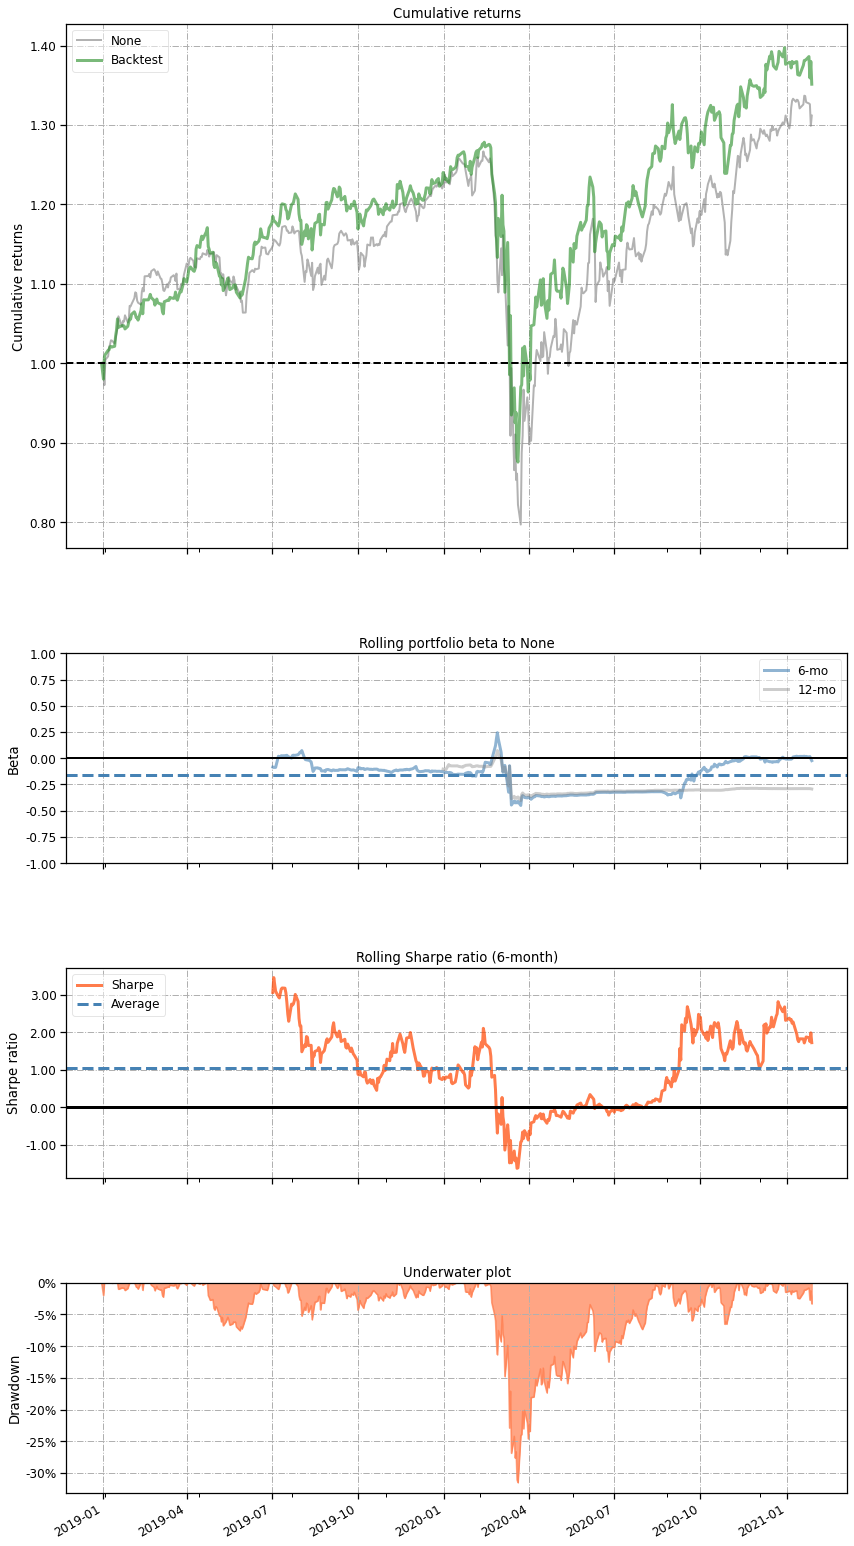

In [ ]:
%matplotlib inline
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_simple_tear_sheet(returns = DRL_strat,benchmark_rets=dow_strat, set_context=False)

# 8 Conclusion:

In this paper, we explore the potential of training Deep Deterministic Policy Gradient (DDPG) agent to learn stock trading strategy. Final results on the testing set shows our agent outperforms DJIA benchmark in both cumulative returns and sharpe ratios.

Further Improvement:
1) Economic indicators and other technical indicators: <br>
Our model is capable of handling additional economic factors and technical indicators. Interested users can add GDP, PMI etc into the state environment. By interacting with the modified environment, the trading agent will derive a corresponding trading strategy to maximize discounted reward over time.

2) Risk aversion measure via utility function: <br>
Our model uses net profit as an optimization target which is under the assumption that our fund agent is risk neutral. However, most people are risk aversion implying they invest less than the risk neutral case under the same risk. The power utility function can be used in our model, which represents the risk aversion of agents. In addition, power utility function is with constant relative risk tolerance, in other words, the agent would pay the same fraction of his/her wealth to avoid a risk proportional to wealth, regardless of the initial wealth. This property is in line with the real situation.

3) Recurrent Neural Network (RNN): <br>
In our implementation, we use FCNN to build our actor and critic network. Further improvement can be done via replacing FCNN with RNN. Related hyperparameter combinations need to be tuned to fit the RNN.

4) Other financial instruments: <br>
Our model is capable of trading other financial instruments such as futures, options and/or bonds. Using futures as an example, interest users can add additional futures specific components (such as futures expiry date) into the state space and modify “step” function accordingly. By interacting with the modified environment, the trading agent will derive a corresponding trading strategy to maximize discounted reward of futures over time.

5) Launch our well trained model on Quantopian Platform: <br>
With well-tuned hyperparameters of DDPG, we can further launch the model on Quantopian platform.

6) Modified version of DDPG: <br>
There are modified version of DDPG: TD3/MADDPG etc can be tested to compare its performance with our standard DDPG.